In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib notebook
import xmltodict 
import json

In [2]:
all_list = os.listdir()
our_list = []
for i, element in enumerate(all_list):
    if not('.phyphox' in element):
        continue
    our_list.append(element)
our_list

['Measurement 2022-11-25 14-49-49.phyphox']

<IPython.core.display.Javascript object>


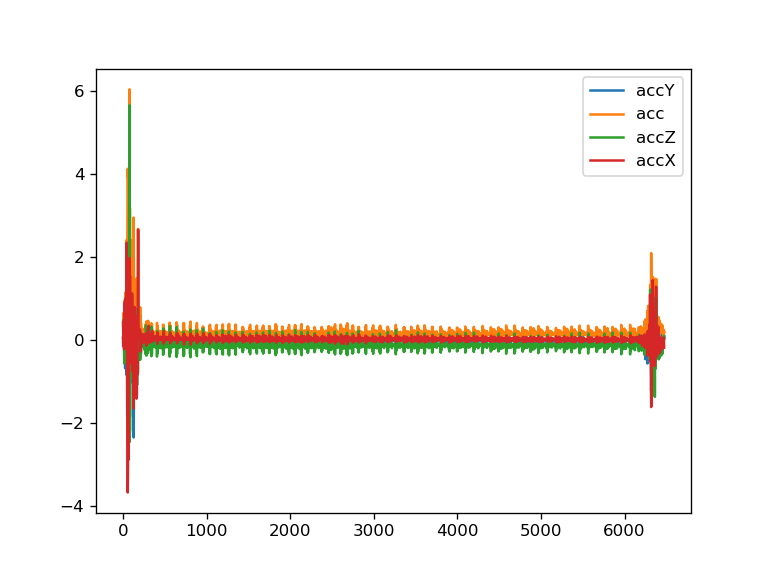

In [3]:
def file_to_easydict(fname):
    f = open(fname, "r", encoding="utf8")
    json_format = json.dumps(xmltodict.parse(f.read()))
    decoded_hand = json.loads(json_format)
    easy_dict = {}
    labels = []
    for i in range(len(decoded_hand['phyphox']['data-containers']['container'])):
        labels.append(decoded_hand['phyphox']['data-containers']['container'][i]['#text'])
        if 'time' in labels[-1]: continue
        data_string = (decoded_hand['phyphox']['data-containers']['container'][i]['@init'])
        data = np.array(data_string.split(','), dtype=float)
        easy_dict[labels[-1]] = data
    return easy_dict

def plot_easydict(easydict):
    for i, key in enumerate(easy_dict.keys()):
        plt.plot(easydict[key],label=key)
    plt.legend()

plt.figure()
easy_dict = file_to_easydict("Measurement 2022-11-25 14-49-49.phyphox")
plot_easydict(easy_dict)

<IPython.core.display.Javascript object>


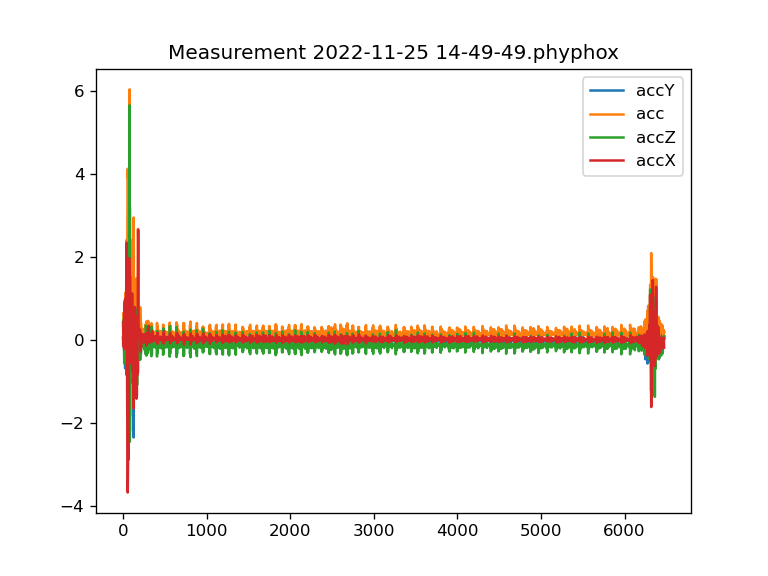

In [4]:
for i, measurement in enumerate(our_list):
    plt.figure()
    plt.title(measurement)
    easy_dict = file_to_easydict(measurement)
    plot_easydict(easy_dict)
    plt.savefig(measurement[:-8]+".png")
    plt.show()
